In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Multi/Base_classifier_result(URL cross)(3).csv")
data.head()

,labels,mlp_prediction_non,mlp_prediction_phish,mlp_prediction_spam,mlp_prediction_malware,mlp_prediction_defacemen,nn_prediction_non,nn_prediction_phish,nn_prediction_spam,nn_prediction_malware,nn_prediction_defacemen,nn2_prediction_non,nn2_prediction_phish,nn2_prediction_spam,nn2_prediction_malware,nn2_prediction_defacemen
0,0,2.279304e-01,3.526691e-07,3.178962e-09,7.720690e-01,2.471273e-07,2.279304e-01,3.526691e-07,3.178962e-09,7.720690e-01,2.471273e-07,2.279304e-01,3.526691e-07,3.178962e-09,7.720690e-01,2.471273e-07
1,0,9.998493e-01,4.839155e-07,1.512190e-09,1.501924e-04,2.285983e-10,9.998493e-01,4.839155e-07,1.512190e-09,1.501924e-04,2.285983e-10,9.998493e-01,4.839155e-07,1.512190e-09,1.501924e-04,2.285983e-10
2,3,1.281426e-06,1.732567e-08,3.980623e-11,9.999982e-01,5.014893e-07,1.281426e-06,1.732567e-08,3.980623e-11,9.999982e-01,5.014893e-07,1.281426e-06,1.732567e-08,3.980623e-11,9.999982e-01,5.014893e-07
3,3,1.273963e-03,6.203745e-08,6.837719e-12,9.987260e-01,1.322388e-11,1.273963e-03,6.203745e-08,6.837719e-12,9.987260e-01,1.322388e-11,1.273963e-03,6.203745e-08,6.837719e-12,9.987260e-01,1.322388e-11
4,2,7.031173e-09,1.819293e-04,9.998181e-01,7.719379e-15,2.118226e-11,7.031173e-09,1.819293e-04,9.998181e-01,7.719379e-15,2.118226e-11,7.031173e-09,1.819293e-04,9.998181e-01,7.719379e-15,2.118226e-11


In [ ]:
data.shape

(6896, 16)

In [ ]:
data.columns

Index(['labels', 'mlp_prediction_non', 'mlp_prediction_phish',
       'mlp_prediction_spam', 'mlp_prediction_malware',
       'mlp_prediction_defacemen', 'nn_prediction_non', 'nn_prediction_phish',
       'nn_prediction_spam', 'nn_prediction_malware',
       'nn_prediction_defacemen', 'nn2_prediction_non', 'nn2_prediction_phish',
       'nn2_prediction_spam', 'nn2_prediction_malware',
       'nn2_prediction_defacemen'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    6896 non-null   int64  
 1   mlp_prediction_non        6896 non-null   float64
 2   mlp_prediction_phish      6896 non-null   float64
 3   mlp_prediction_spam       6896 non-null   float64
 4   mlp_prediction_malware    6896 non-null   float64
 5   mlp_prediction_defacemen  6896 non-null   float64
 6   nn_prediction_non         6896 non-null   float64
 7   nn_prediction_phish       6896 non-null   float64
 8   nn_prediction_spam        6896 non-null   float64
 9   nn_prediction_malware     6896 non-null   float64
 10  nn_prediction_defacemen   6896 non-null   float64
 11  nn2_prediction_non        6896 non-null   float64
 12  nn2_prediction_phish      6896 non-null   float64
 13  nn2_prediction_spam       6896 non-null   float64
 14  nn2_pred

In [ ]:
import numpy as np

y_f = data['labels']
x_f = data.drop('labels',axis=1)

x = np.array(x_f)
y = y_f.values



print(x.shape, y.shape)




(6896, 15) (6896,)


In [ ]:
# one hot encoding

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

encoder.fit(y)
en_y = encoder.transform(y)
dy = np_utils.to_categorical(en_y)



In [ ]:
import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_training, x_val, y_training, y_val, opt, early_stopping_monitor):

  model = Sequential()
  model.add(Dense(10, input_dim=15, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer = opt, loss='mse', metrics=["accuracy"])

  # print("check point")
  history = model.fit(x_training, y_training, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()

  print('Validation Accuracy: ')
  y_pred = model.predict(x_val)
  Y_pred_classes = np.argmax(y_pred,axis = 1) 
  Y_true = np.argmax(y_val,axis = 1) 


  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(Y_true, Y_pred_classes))

  #target_names = ['True', 'False']
  print(classification_report(Y_true, Y_pred_classes))


  print(confusion_matrix(Y_true, Y_pred_classes))

  # print('Precision: %.4f' % precision_score(y_val, y_pred))
  # print('Recall: %.4f' % recall_score(y_val, y_pred))
  # print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  # tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  # print('True Positive', tp)
  # print('True Negative', tn)
  # print('False Positive', fp)
  # print('False Negative', fn)


Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.2076 - accuracy: 0.4765 - val_loss: 0.1658 - val_accuracy: 0.9391
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.1284 - accuracy: 0.9575 - val_loss: 0.0957 - val_accuracy: 0.9449
Epoch 3/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 0.9591 - val_loss: 0.0576 - val_accuracy: 0.9464
Epoch 4/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9579 - val_loss: 0.0387 - val_accuracy: 0.9478
Epoch 5/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0296 - accuracy: 0.9584 - val_loss: 0.0295 - val_accuracy: 0.9464
Epoch 6/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9587 - val_loss: 0.0251 - val_accuracy: 0.9464
Epoch 7/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.9589 - val_loss: 0.0227 - val_accuracy: 0.9464

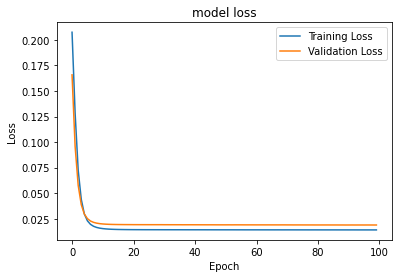

Validation Accuracy: 
Accuracy: 0.9478260869565217
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       231
           1       0.92      0.88      0.90        83
           2       0.95      0.92      0.94       119
           3       0.94      0.97      0.96       152
           4       0.96      0.95      0.96       105

    accuracy                           0.95       690
   macro avg       0.95      0.94      0.94       690
weighted avg       0.95      0.95      0.95       690

[[223   2   0   5   1]
 [  6  73   1   3   0]
 [  4   1 110   1   3]
 [  0   3   1 148   0]
 [  1   0   4   0 100]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1710 - accuracy: 0.3555 - val_loss: 0.1171 - val_accuracy: 0.4667
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0896 - accuracy: 0.7720 - val_loss: 0.0672 - val_accuracy: 0.7812
Epoch 3/100
194/194 [==============================] - 0s 

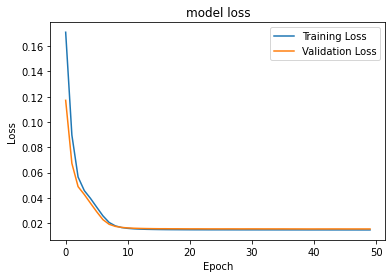

Validation Accuracy: 
Accuracy: 0.9579710144927536
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       225
           1       0.86      0.93      0.90        74
           2       0.96      0.93      0.95       132
           3       0.97      0.97      0.97       159
           4       0.96      0.97      0.97       100

    accuracy                           0.96       690
   macro avg       0.95      0.95      0.95       690
weighted avg       0.96      0.96      0.96       690

[[218   3   2   1   1]
 [  1  69   0   2   2]
 [  2   4 123   2   1]
 [  1   4   0 154   0]
 [  0   0   3   0  97]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1293 - accuracy: 0.7246 - val_loss: 0.0573 - val_accuracy: 0.9652
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9575 - val_loss: 0.0265 - val_accuracy: 0.9652
Epoch 3/100
194/194 [==============================] - 0s 

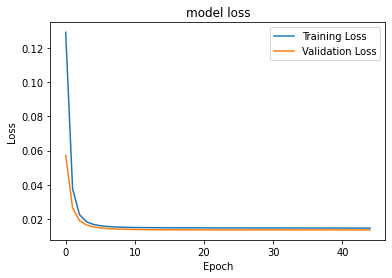

Validation Accuracy: 
Accuracy: 0.9652173913043478
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       226
           1       0.95      0.95      0.95        84
           2       0.97      0.94      0.96       120
           3       0.98      0.96      0.97       163
           4       0.97      0.97      0.97        97

    accuracy                           0.97       690
   macro avg       0.97      0.96      0.96       690
weighted avg       0.97      0.97      0.97       690

[[223   2   0   1   0]
 [  3  80   0   1   0]
 [  2   1 113   1   3]
 [  6   1   0 156   0]
 [  0   0   3   0  94]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1224 - accuracy: 0.7979 - val_loss: 0.0609 - val_accuracy: 0.9507
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9578 - val_loss: 0.0292 - val_accuracy: 0.9536
Epoch 3/100
194/194 [==============================] - 1s 

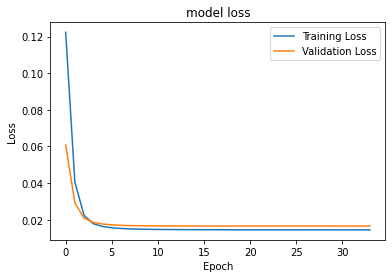

Validation Accuracy: 
Accuracy: 0.9521739130434783
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       223
           1       0.93      0.85      0.89        66
           2       0.96      0.92      0.94       142
           3       0.96      0.97      0.96       153
           4       0.94      0.96      0.95       106

    accuracy                           0.95       690
   macro avg       0.95      0.94      0.94       690
weighted avg       0.95      0.95      0.95       690

[[219   0   1   3   0]
 [  5  56   2   3   0]
 [  1   3 131   1   6]
 [  2   0   1 149   1]
 [  2   1   1   0 102]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1319 - accuracy: 0.6247 - val_loss: 0.0604 - val_accuracy: 0.9594
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9568 - val_loss: 0.0271 - val_accuracy: 0.9623
Epoch 3/100
194/194 [==============================] - 0s 

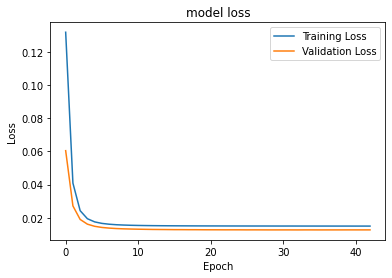

Validation Accuracy: 
Accuracy: 0.9652173913043478
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       206
           1       0.88      0.92      0.90        72
           2       0.98      0.96      0.97       163
           3       0.98      0.97      0.97       158
           4       0.98      0.98      0.98        91

    accuracy                           0.97       690
   macro avg       0.96      0.96      0.96       690
weighted avg       0.97      0.97      0.97       690

[[202   1   0   2   1]
 [  5  66   1   0   0]
 [  1   4 156   1   1]
 [  1   4   0 153   0]
 [  0   0   2   0  89]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1211 - accuracy: 0.7759 - val_loss: 0.0495 - val_accuracy: 0.9652
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9567 - val_loss: 0.0217 - val_accuracy: 0.9667
Epoch 3/100
194/194 [==============================] - 0s 

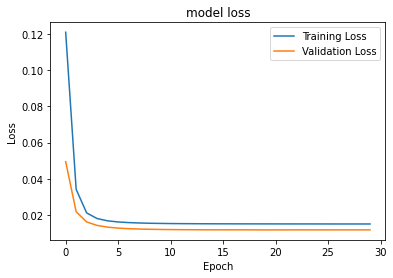

Validation Accuracy: 
Accuracy: 0.9652173913043478
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       215
           1       0.95      0.96      0.95        76
           2       0.97      0.91      0.94       123
           3       0.98      0.97      0.98       182
           4       0.93      0.97      0.95        94

    accuracy                           0.97       690
   macro avg       0.96      0.96      0.96       690
weighted avg       0.97      0.97      0.97       690

[[213   1   0   1   0]
 [  1  73   0   2   0]
 [  3   1 112   0   7]
 [  2   2   1 177   0]
 [  0   0   3   0  91]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1358 - accuracy: 0.6837 - val_loss: 0.0623 - val_accuracy: 0.9652
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9576 - val_loss: 0.0273 - val_accuracy: 0.9652
Epoch 3/100
194/194 [==============================] - 0s 

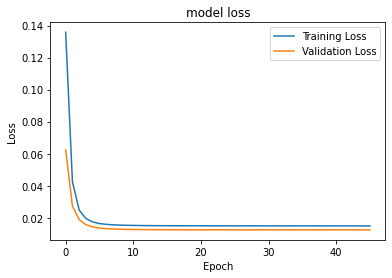

Validation Accuracy: 
Accuracy: 0.9637155297532656
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       242
           1       0.90      0.88      0.89        64
           2       0.93      0.98      0.95       128
           3       0.98      0.97      0.97       150
           4       0.99      0.95      0.97       105

    accuracy                           0.96       689
   macro avg       0.96      0.95      0.95       689
weighted avg       0.96      0.96      0.96       689

[[238   3   0   1   0]
 [  3  56   4   1   0]
 [  1   0 125   1   1]
 [  2   2   1 145   0]
 [  0   1   4   0 100]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1647 - accuracy: 0.4400 - val_loss: 0.1018 - val_accuracy: 0.9536
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9570 - val_loss: 0.0445 - val_accuracy: 0.9579
Epoch 3/100
194/194 [==============================] - 0s 

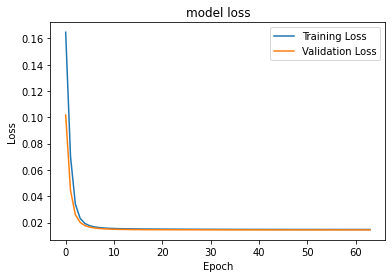

Validation Accuracy: 
Accuracy: 0.9564586357039188
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       227
           1       0.93      0.93      0.93        68
           2       0.99      0.91      0.95       146
           3       0.97      0.97      0.97       151
           4       0.91      0.95      0.93        97

    accuracy                           0.96       689
   macro avg       0.95      0.95      0.95       689
weighted avg       0.96      0.96      0.96       689

[[224   0   0   3   0]
 [  4  63   0   0   1]
 [  3   2 133   0   8]
 [  2   2   0 147   0]
 [  1   1   1   2  92]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1344 - accuracy: 0.7377 - val_loss: 0.0656 - val_accuracy: 0.9419
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9588 - val_loss: 0.0290 - val_accuracy: 0.9434
Epoch 3/100
194/194 [==============================] - 0s 

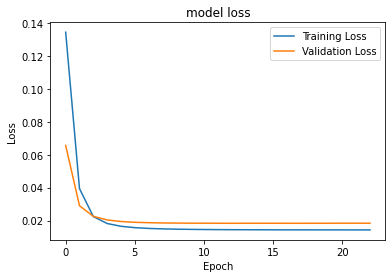

Validation Accuracy: 
Accuracy: 0.9433962264150944
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       225
           1       0.91      0.87      0.89        70
           2       0.96      0.95      0.95       129
           3       0.96      0.96      0.96       156
           4       0.96      0.91      0.93       109

    accuracy                           0.94       689
   macro avg       0.94      0.93      0.94       689
weighted avg       0.94      0.94      0.94       689

[[219   1   0   4   1]
 [  7  61   0   2   0]
 [  2   1 122   1   3]
 [  4   2   1 149   0]
 [  4   2   4   0  99]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1112 - accuracy: 0.7069 - val_loss: 0.0466 - val_accuracy: 0.9594
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9570 - val_loss: 0.0234 - val_accuracy: 0.9594
Epoch 3/100
194/194 [==============================] - 0s 

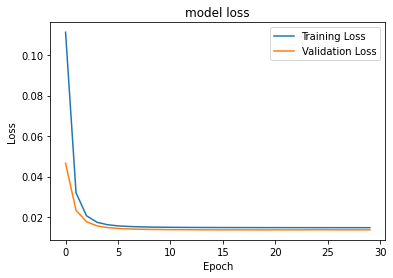

Validation Accuracy: 
Accuracy: 0.9608127721335269
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       201
           1       0.96      0.87      0.91        82
           2       0.95      0.94      0.95       130
           3       0.98      0.99      0.98       161
           4       0.96      0.96      0.96       115

    accuracy                           0.96       689
   macro avg       0.96      0.95      0.95       689
weighted avg       0.96      0.96      0.96       689

[[199   0   0   1   1]
 [  4  71   3   2   2]
 [  3   2 122   1   2]
 [  1   0   0 160   0]
 [  1   1   3   0 110]]


In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)


kf = KFold(n_splits=10, random_state=10, shuffle=True)
for train, val in kf.split(x, dy):
  model_aa(x[train], x[val], dy[train], dy[val], optimizer1, early_stopping_monitor)